# Visualisation of reproduced results

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt

# Loading the data

### TRPO 

In [11]:
path_to_results_maze_trpo = "server_results/maze_trpo/start-maze11-trpo-onlyFeas-debugged_2019_01_30_11_33_55_"
name = "maze_trpo"
file_name = "progress.csv"

data = np.array([])
num_runs = 10
for run in range(num_runs):
    file_path = path_to_results_maze_trpo + "{:04d}/".format(run+1) + file_name
    with open(file_path, 'r') as csvfile:
        data_file = csv.reader(csvfile, delimiter=',', quotechar='|')

        file_content = []
        for row in data_file:
            file_content.append(row)

        column_titles = file_content[0]
        
        reordering_index = [column_titles.index('Outer_iter'),
                            column_titles.index('Outer_Success'),
                            column_titles.index('Outer_MeanRewards'),
                            column_titles.index('GenGoal_frac_High rewards'),
                            column_titles.index('GenGoal_frac_Other'),
                            column_titles.index('GenGoal_frac_Good goals'),
                            column_titles.index('GenGoal_frac_Performance Variation'),
                            column_titles.index('GenGoal_frac_Low rewards')]
        
        
        file_data = np.array([])
        for row in file_content[1:]:
            if(file_data.shape == (0,)):
                file_data = np.array([float(i) for i in row])
            else:
                file_data = np.vstack((file_data, np.array([float(i) for i in row])))
                
        file_data = file_data[:, reordering_index]
       
    if(data.shape == (0,)):
        data = np.array([file_data])
    else:
        data = np.vstack((data, [file_data]))

data_trpo_extend_dist_rew_false = data[:5]
data_trpo_extend_dist_rew_true = data[5:]

#### Brownian 

In [12]:
path_to_results = "server_results/"
name = "maze_brownian"
file_name = "progress.csv"

stat_categories = ['Outer_iter', 'Outer_Success', 'Outer_MeanRewards', 'GenGoal_frac_High rewards',
                   'GenGoal_frac_Other', 'GenGoal_frac_Good goals', 'GenGoal_frac_Performance Variation',
                   'GenGoal_frac_Low rewards']

data = np.array([])
num_runs = 8
for run in range(num_runs):
    file_path = path_to_results + name + "/{:04d}/".format(run+1) + file_name
    with open(file_path, 'r') as csvfile:
        data_file = csv.reader(csvfile, delimiter=',', quotechar='|')

        file_content = []
        for row in data_file:
            file_content.append(row)

        column_titles = file_content[0]
        
        reordering_index = [column_titles.index('Outer_iter'),
                            column_titles.index('Outer_Success'),
                            column_titles.index('Outer_MeanRewards'),
                            column_titles.index('GenGoal_frac_High rewards'),
                            column_titles.index('GenGoal_frac_Other'),
                            column_titles.index('GenGoal_frac_Good goals'),
                            column_titles.index('GenGoal_frac_Performance Variation'),
                            column_titles.index('GenGoal_frac_Low rewards')]
        
        
        file_data = np.array([])
        for row in file_content[1:]:
            # print(np.array([float(i) for i in row]).shape)
            if(file_data.shape == (0,)):
                file_data = np.array([float(i) for i in row])
            else:
                file_data = np.vstack((file_data, np.array([float(i) for i in row])))
                
        
        ### reordering ###
        file_data = file_data[:, reordering_index]
       
    if(data.shape == (0,)):
        data = np.array([file_data])
    else:
        data = np.vstack((data, [file_data]))

data_brownian_good_starts = data[:5]
data_brownian_previous_starts = data[5:]

# Plot generation 

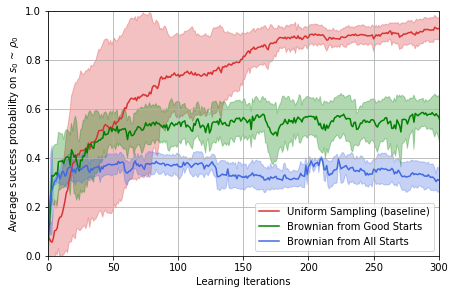

In [90]:
def show_mean_and_variance(data, color="green", label="mean", iteration_per_run=399):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    plt.plot(range(iteration_per_run), mean, label=label, color=color)
    plt.fill_between(range(iteration_per_run), mean + std,  mean - std, \
                     alpha=0.3, color=color)

plt.figure(figsize=(14/2,9/2))
# plt.title("Reproduction using code from RLLAB's repository") # TODO
plt.xlabel("Learning Iterations")
plt.ylabel("Average success probability on $s_0$ ~ $\\rho_0$")
plt.xlim(0, 300)
plt.ylim(0, 1)

show_mean_and_variance(data_trpo_extend_dist_rew_false[:,:,1], label="Uniform Sampling (baseline)", color='#d83233')
# show_mean_and_variance(data_trpo_extend_dist_rew_true[:,:,1], label="trpo_extend_dist_rew")

show_mean_and_variance(data_brownian_good_starts[:,:,1], label="Brownian from Good Starts", color="green")
show_mean_and_variance(data_brownian_previous_starts[:,:,1], label="Brownian from All Starts", color="royalblue")

plt.legend()
plt.grid()
plt.savefig("images/reproduced_results.pdf")
plt.show()

# OLD CODE 

In [ ]:
# for stat_type in range(stat_types):
#     plt.title(name + ": "+ stat_categories[stat_type])
#     plt.xlabel("iteration")
#     for run in range(num_runs):
#         plt.plot(range(iteration_per_run), data[run, :, stat_type], label=run)
#     plt.legend()
#     plt.show()

## show good starts ##
for stat_type in range(1, 2):# stat_types2):
    plt.title(name + ": Good Starts - " + stat_categories[stat_type])
    plt.xlabel("iteration")
    for run in range(data_good_starts.shape[0]):
        plt.plot(range(iteration_per_run), data_good_starts[run, :, stat_type], label=run, alpha=0.7)

    show_mean_and_variance(data_good_starts, stat_type)

    plt.legend()
    plt.savefig("images/" + name + "_good_starts.pdf")
    plt.show()
    
## show previous starts ##
for stat_type in range(1, 2):# stat_types2):
    plt.title(name + ": Previous Starts - " + stat_categories[stat_type])
    plt.xlabel("iteration")
    for run in range(data_previous_starts.shape[0]):
        plt.plot(range(iteration_per_run), data_previous_starts[run, :, stat_type], label=run, alpha=0.7)

    show_mean_and_variance(data_previous_starts, stat_type)
    
    plt.legend()
    plt.savefig("images/" + name + "_previous_starts.pdf")
    plt.show()

In [ ]:
stat_categories = ['Outer_iter', 'Outer_Success', 'Outer_MeanRewards', 'GenGoal_frac_High rewards',
                   'GenGoal_frac_Other', 'GenGoal_frac_Good goals', 'GenGoal_frac_Performance Variation',
                   'GenGoal_frac_Low rewards']
stat_types = len(stat_categories)

In [ ]:
## show good starts ##
for stat_type in range(1, 2):# stat_types2):
    plt.title(name + ": Good Starts - " + stat_categories[stat_type])
    plt.xlabel("iteration")
    for run in range(data_good_starts.shape[0]):
        plt.plot(range(iteration_per_run), data_good_starts[run, :, stat_type], label=run, alpha=0.7)

    show_mean_and_variance(data_good_starts, stat_type)

    plt.legend()
    plt.savefig("images/" + name + "_good_starts.pdf")
    plt.show()
    
## show previous starts ##
for stat_type in range(1, 2):# stat_types2):
    plt.title(name + ": Previous Starts - " + stat_categories[stat_type])
    plt.xlabel("iteration")
    for run in range(data_previous_starts.shape[0]):
        plt.plot(range(iteration_per_run), data_previous_starts[run, :, stat_type], label=run, alpha=0.7)

    show_mean_and_variance(data_previous_starts, stat_type)
    
    plt.legend()
    plt.savefig("images/" + name + "_previous_starts.pdf")
    plt.show()

ValueError: Input passed into argument "'y1'"is not 1-dimensional.

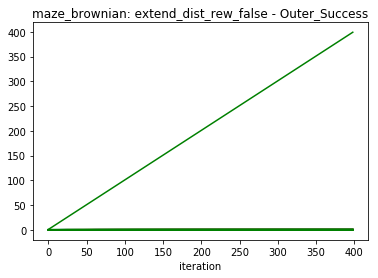

In [26]:
for stat_type in range(1,2):
    plt.title(name + ": extend_dist_rew_false - " + stat_categories[stat_type])
    plt.xlabel("iteration")
    for run in range(data_extend_dist_rew_false.shape[0]):
        plt.plot(range(iteration_per_run), data_extend_dist_rew_false[run, :, stat_type], label=run)
    show_mean_and_variance(data_extend_dist_rew_false, stat_type)
    plt.legend()
    plt.show()    

for stat_type in range(1,2):
    plt.title(name + ": extend_dist_rew_true - " + stat_categories[stat_type])
    plt.xlabel("iteration")
    for run in range(data_extend_dist_rew_true.shape[0]):
        plt.plot(range(iteration_per_run), data_extend_dist_rew_true[run, :, stat_type], label=run)

    show_mean_and_variance(data_extend_dist_rew_true, stat_type)
    plt.legend()
    plt.show()

In [ ]:
def reorder_array(array, order):
    array = array[:, order]
    return array

a = np.array([[0, 1, 2, 3, 4, 5, 6, -1], [0, 1, 2, 3, 4, 5, 6, -1]])
print(a.shape)
b = [7,0,1,2,3,4,5,6]
print(a.shape)

c = reorder_array(a, b)
print(c)